# Eliiza Hamlet Challenge

### Construct a report that covers the following three questions. The report is intended to describe your analysis and present your results for a mixed technical audience.

### 1. Show the number of lines said per character throughout the play.

### Logic Pipeline:
    - Compile a list of all the Hamlet characters
    - Chunk the text into lines
    - Strip empty characters (letters) from each line
    - Filter out empty lines
    - Filter out lines with no alphanumeric characters (letters / numbers)
    - Filter out lines that contain the word `HAMLET` alone 
    - Filter out lines that start with a bracket or the word `ACT` or the word `SCENE`
    - Start with line 38 (where the conversation between Hamlet characters starts)
    - Concatenate the lines that do not start with a Hamlet character with the Hamlet character who said the previous line (as he/she continues the speech)
    - Extract the Hamlet character from each line into a list
    - Count the characters in the list. The counts should indicate the number of lines said per character. 

In [1]:
import re
import pandas as pd
from collections import Counter
characters = [
    'KING CLAUDIUS',
    'HAMLET',
    'LORD POLONIUS',
    'HORATIO',
    'LAERTES',
    'LUCIANUS',
    'VOLTIMAND',
    'CORNELIUS',
    'ROSENCRANTZ',
    'GUILDENSTERN',
    'OSRIC',
    'MARCELLUS',
    'BERNARDO',
    'FRANCISCO',
    'REYNALDO',
    'First Player',
    'Player King',
    'Player Queen',
    'First Clown',
    'Second Clown',
    'PRINCE FORTINBRAS',
    'First Ambassador',
    'QUEEN GERTRUDE',
    'OPHELIA',
    'Lord',
    'First Sailor',
    'Messenger',
    'Ghost'
]
p = re.compile(r'^\b('+'|'.join(characters)+r')\b')
global_char = ''
global_list = []
with open('hamlet.txt') as f:
    mylist = [line.rstrip('\n') for line in f]
    mylist = [line.strip() for line in mylist]
    mylist = [line for line in mylist if len(line) > 0]
    mylist = [line for line in mylist if any(c.isalnum() for c in line)]
    mylist = [line for line in mylist if not (line in ['HAMLET'] or line.startswith('[') or line.endswith(']')
                                              or line.startswith('ACT ') or line.startswith('SCENE '))]
    mylist = mylist[38:]
for line in mylist:
    search = re.search(p, line)
    if search is not None:
        global_char = search.group(1)
    else:
        line = global_char + ' ' + line
    search = re.search(p, line)
    if search is not None:
        global_list.append(search.group(1))
    #print(line)
c_dict = dict(Counter(global_list))
df = pd.DataFrame.from_dict(c_dict, orient='index').reset_index()
df.columns = ['Character', 'Lines']
df = df.sort_values(by='Lines', ascending=False).reset_index(drop=True)
df

,Character,Lines
0,HAMLET,1173
1,KING CLAUDIUS,530
2,LORD POLONIUS,350
3,HORATIO,234
4,LAERTES,174
5,QUEEN GERTRUDE,159
6,OPHELIA,138
7,ROSENCRANTZ,101
8,Ghost,95
9,MARCELLUS,73


### 2. Make a word cloud of unusual words in the script.

### Logic Pipeline:
    - Compile a list of all the Hamlet characters
    - Chunk the text into lines
    - Strip empty characters (letters) from each line
    - Filter out empty lines
    - Filter out lines with no alphanumeric characters (letters / numbers)
    - Filter out lines that contain the word `HAMLET` alone 
    - Filter out lines that start with a bracket or the word `ACT` or the word `SCENE`
    - Start with line 38 (where the conversation between Hamlet characters starts)
    - Filter out the names of the Hamlet characters from the script
    - Filter out STOP WORDS (NLTK) and user-defined common words
    - Use the English Corpus (NLTK) to identify the words not in the English vocabulary (unusual words).
    - Filter out Plural Words from the unusual words list 
    - Extract the unusual words from each line into a list  
    - Plot the Word Cloud based on the unusual words list

[nltk_data] Downloading package words to /home/ahmad/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ahmad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


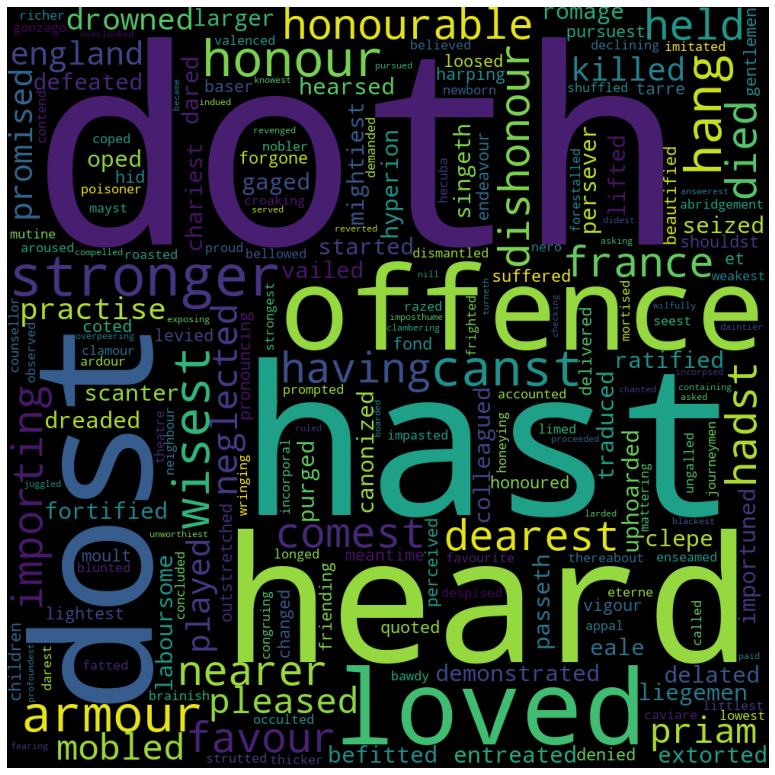

In [2]:
#!pip install wordcloud
import re
import pandas as pd
import nltk
nltk.download('words')
nltk.download('stopwords')
import wordcloud
from nltk.corpus import stopwords
%matplotlib inline
from matplotlib import pyplot as plt
from collections import Counter
characters = [
    'KING CLAUDIUS',
    'HAMLET',
    'LORD POLONIUS',
    'HORATIO',
    'LAERTES',
    'LUCIANUS',
    'VOLTIMAND',
    'CORNELIUS',
    'ROSENCRANTZ',
    'GUILDENSTERN',
    'OSRIC',
    'MARCELLUS',
    'BERNARDO',
    'FRANCISCO',
    'REYNALDO',
    'First Player',
    'Player King',
    'Player Queen',
    'First Clown',
    'Second Clown',
    'PRINCE FORTINBRAS',
    'First Ambassador',
    'QUEEN GERTRUDE',
    'OPHELIA',
    'Lord',
    'First Sailor',
    'Messenger',
    'Ghost'
]
p = re.compile(r'\b('+'|'.join(characters)+r')\b', re.IGNORECASE)
unusual_list = []
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab) 
    return unusual
with open('hamlet.txt') as f:
    mylist = [line.rstrip('\n') for line in f]
    mylist = [line.strip() for line in mylist]
    mylist = [line for line in mylist if len(line) > 0]
    mylist = [line for line in mylist if any(c.isalnum() for c in line)]
    mylist = [line for line in mylist if not (line in ['HAMLET'] or line.startswith('[') or line.endswith(']')
                                              or line.startswith('ACT ') or line.startswith('SCENE '))]
    mylist = mylist[38:]
for line in mylist:
    line = re.sub(p,  '', line)
    unusual_lst = list(unusual_words(line.split(" ")))
    if len(unusual_lst) > 0:
        unusual_list = unusual_list + unusual_lst
    #if len(unusual_list) > 200:
    #    break
stop_words = list(set(stopwords.words('english'))) + ['text', 'stronger', 'object', 'Length', 'Name', 'asked']
unusual_list = [x for x in unusual_list if not x.endswith('s')] 
c_dict = dict(Counter(unusual_list))
unusual_df = pd.DataFrame({'text': unusual_list})
wordcloud = wordcloud.WordCloud(width = 1000, height = 1000, background_color = 'black', stopwords = stop_words, 
                                max_words = 500, min_font_size = 4).generate_from_frequencies(c_dict)
fig = plt.figure(figsize = (14,14), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 3. Compute the sentiment score for each scene.

### Logic Pipeline:
    - Compile a list of all the Hamlet characters
    - Chunk the text into lines
    - Strip empty characters (letters) from each line
    - Filter out empty lines
    - Filter out lines with no alphanumeric characters (letters / numbers)
    - Filter out lines that contain the word `HAMLET` alone 
    - Filter out lines that start with a bracket or the word `ACT`
    - Start with line 38 (where the conversation between Hamlet characters starts)
    - Filter out the names of the Hamlet characters from the script
    - Filter out STOP WORDS (NLTK)
    - Group the lines by the SCENE Number.
    - Use (TEXTBLOB) to score the Sentiment Polarity for each line in each SCENE
    - Compute the mean Sentiment Polarity for each SCENE

In [3]:
#!pip install -U textblob
#!python -m textblob.download_corpora
import re
import pandas as pd
from textblob import TextBlob
characters = [
    'KING CLAUDIUS',
    'HAMLET',
    'LORD POLONIUS',
    'HORATIO',
    'LAERTES',
    'LUCIANUS',
    'VOLTIMAND',
    'CORNELIUS',
    'ROSENCRANTZ',
    'GUILDENSTERN',
    'OSRIC',
    'MARCELLUS',
    'BERNARDO',
    'FRANCISCO',
    'REYNALDO',
    'First Player',
    'Player King',
    'Player Queen',
    'First Clown',
    'Second Clown',
    'PRINCE FORTINBRAS',
    'First Ambassador',
    'QUEEN GERTRUDE',
    'OPHELIA',
    'Lord',
    'First Sailor',
    'Messenger',
    'Ghost'
]
p = re.compile(r'\b('+'|'.join(characters)+r')\b', re.IGNORECASE)
p_scene = re.compile(r'^SCENE .*')
global_scene = ''
scenes = {}
global_list = []
with open('hamlet.txt') as f:
    mylist = [line.rstrip('\n') for line in f]
    mylist = [line.strip() for line in mylist]
    mylist = [line for line in mylist if len(line) > 0]
    mylist = [line for line in mylist if any(c.isalnum() for c in line)]
    mylist = [line for line in mylist if not (line in ['HAMLET'] or line.startswith('[') or line.endswith(']')
                                              or line.startswith('ACT '))]
    mylist = mylist[38:]
for line in mylist:
    line = re.sub(p,  '', line)
    search = re.search(p_scene, line)
    if search is not None:
        global_scene = search.group(0)
    else:
        if global_scene not in scenes.keys():
            scenes[global_scene] = [line]
        else:
            scenes[global_scene] = scenes[global_scene] + [line]
    #print(line)
summary_df = pd.DataFrame(columns=['Scene Number / Name', 'Number of Lines', 'Mean Scene Sentiment Polarity'])
c = 0
for scene in scenes.keys():
    #print('Scene Number / Name: {0}'.format(scene))
    #print('Number of Lines: {0}'.format(len(scenes[scene])))
    scene_df = pd.DataFrame({'text': scenes[scene]})
    scene_blob = [TextBlob(text) for text in scene_df['text']]
    scene_df['tb_Pol'] = [b.sentiment.polarity for b in scene_blob]
    mean_scene_tb_Pol = scene_df['tb_Pol'].mean()
    #print('Mean Scene Sentiment Polarity: {0}'.format(mean_scene_tb_Pol))
    summary_df.loc[c] = [scene, len(scenes[scene]), mean_scene_tb_Pol]
    c += 1
summary_df.sort_values(by='Mean Scene Sentiment Polarity', ascending=False).reset_index(drop=True)

,Scene Number / Name,Number of Lines,Mean Scene Sentiment Polarity
0,SCENE II\tA room in the castle.,617,0.090777
1,SCENE I\tA room in the castle.,248,0.088592
2,SCENE II\tAnother room in the castle.,32,0.080729
3,SCENE I\tA churchyard.,74,0.074730
4,SCENE II\tA hall in the castle.,405,0.070914
5,SCENE VI\tAnother room in the castle.,33,0.070455
6,SCENE V\tElsinore. A room in the castle.,230,0.058263
7,SCENE IV\tA plain in Denmark.,68,0.053423
8,SCENE V\tAnother part of the platform.,215,0.052825
9,SCENE II\tA room of state in the castle.,285,0.049481
